
<br>
Research Question 3<br>
How frequently each type of cell-level change happens in the notebook file history?<br>


In [43]:
import os
import sys
sys.path.insert(1,"/home/lofowl/Desktop/CISC834/project/Jupyter-cell-evoluation/lib")

In [48]:
from Config import SAVE_FOLDER
from CellMapping import CellMapping
from tqdm import tqdm

In [50]:
mapping_path = f'{SAVE_FOLDER}/mapping_cache'
mapping_names = os.listdir(f'{mapping_path}')

In [51]:
identical,modified,split,merge,move,add,delete = list(),list(),list(),list(),list(),list(),list()

In [52]:
for mapping_name in tqdm(mapping_names):
    try:
        cm = CellMapping(f'{mapping_path}/{mapping_name}')
        a_1,a_2,a_3,a_4,a_5,a_6,a_7 = cm.modified_position()
        identical.append(len(a_1))
        modified.append(len(a_2))
        split.append(len(a_3))
        merge.append(len(a_4))
        move.append(len(a_5))
        add.append(len(a_6))
        delete.append(len(a_7))
    except:
        pass

100%|██████████| 24809/24809 [57:24<00:00,  7.20it/s]   


In [95]:
import seaborn as sns
import numpy as np
import pandas as pd
tips = sns.load_dataset("tips")

In [96]:
pd_identical = [('identical',i) for i in identical]
pd_modified = [('modified',i) for i in modified]
pd_split = [('split',i) for i in split]
pd_merge = [('merge',i) for i in merge]
pd_move = [('moved',i) for i in move]
pd_add = [('added',i) for i in add]
pd_delete = [('deleted',i) for i in delete]

In [97]:
pd_data = pd_identical + pd_modified + pd_split + pd_merge + pd_move + pd_add + pd_delete
pd_data = pd.DataFrame(data=pd_data,columns=['type','count'])

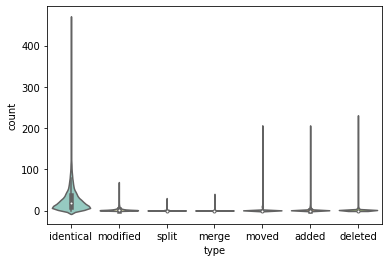

In [109]:
ax = sns.violinplot(x="type", y="count", data=pd_data,scale="width", palette="Set3")
ax.get_figure().savefig('./result/rq3.png')

In [107]:
identical_pd_data = pd_data[pd_data['type'] == 'merge']

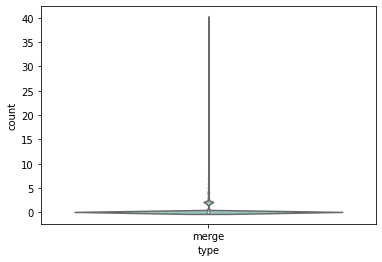

In [108]:
ax = sns.violinplot(x="type", y="count", data=identical_pd_data,scale="width", palette="Set3")